# The profanity project

### In this notebook the code for generating the second analysis of usage of curse words/phrases is preformed. \n The data is coming from #theprofanityproject created by Johanna Blom.

### Thanks to everyone who has contributed with their curse words! 

In [3]:
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline 

In [4]:
gnraw = pd.read_csv(r'pp_gn.csv')

## Change language to index
gnraw.set_index('Language', inplace=True)
gnraw.head()

,Poop,Illness and IDD,An act of religion,Ethnic and social slurs,Sex and the Human body,Animal related,Earth and plants related,Miscellaneous profanity
Language,,,,,,,,
English,1,1,0,0,6,0,0,0
Irish,0,1,1,0,2,0,0,0
French,2,1,0,0,6,0,0,1
Spanish,3,2,0,0,3,2,0,0
Italian,3,0,0,0,3,0,0,0


## Calculate total

In [5]:
def total(row):
    poop = row['Poop']
    ill = row['Illness and IDD']
    relg = row['An act of religion']
    eth = row['Ethnic and social slurs']
    sex = row['Sex and the Human body']
    animal = row['Animal related']
    earth = row['Earth and plants related']
    mis = row['Miscellaneous profanity']
    return poop+ill+relg+eth+sex+animal+earth+mis

gnraw["total"] = gnraw.apply(total, axis=1)
gnraw

,Poop,Illness and IDD,An act of religion,Ethnic and social slurs,Sex and the Human body,Animal related,Earth and plants related,Miscellaneous profanity,total
Language,,,,,,,,,
English,1,1,0,0,6,0,0,0,8
Irish,0,1,1,0,2,0,0,0,4
French,2,1,0,0,6,0,0,1,10
Spanish,3,2,0,0,3,2,0,0,10
Italian,3,0,0,0,3,0,0,0,6
German,1,1,0,2,2,0,1,0,7
Portuguese,2,0,0,0,4,0,0,0,6
Russian,1,1,0,0,1,1,1,0,5
Chinese,1,3,0,0,3,6,0,3,16


## Calculate % of all categories

In [6]:
# Poop
def percentp(row):
    p = row['Poop']
    ct = row['total']
    return p/ct

gnraw["Poop (%)"] = gnraw.apply(percentp, axis=1)

# Illness
def percentidd(row):
    idd = row['Illness and IDD']
    ct = row['total']
    return idd/ct

gnraw["Illness & IDD (%)"] = gnraw.apply(percentidd, axis=1)

# Religion
def percentr(row):
    rel = row['An act of religion']
    ct = row['total']
    return rel/ct

gnraw["Religion (%)"] = gnraw.apply(percentr, axis=1)

#Ethic & social slurs
def percentes(row):
    es = row['Ethnic and social slurs']
    ct = row['total']
    return es/ct

gnraw["Ethnic & social slurs (%)"] = gnraw.apply(percentes, axis=1)

# Sex & Human body
def percentsh(row):
    sh = row['Sex and the Human body']
    ct = row['total']
    return sh/ct

gnraw["Sex & the Human body (%)"] = gnraw.apply(percentsh, axis=1)

# Animal
def percenta(row):
    a = row['Animal related']
    ct = row['total']
    return a/ct

gnraw["Animal related (%)"] = gnraw.apply(percenta, axis=1)

# Earth
def percentep(row):
    ep = row['Earth and plants related']
    ct = row['total']
    return ep/ct

gnraw["Earth & plants related (%)"] = gnraw.apply(percentep, axis=1)

# Miscellaneous
def percentm(row):
    m = row['Miscellaneous profanity']
    ct = row['total']
    return m/ct

gnraw["Miscellaneous (%)"] = gnraw.apply(percentm, axis=1)

## Choose the columns of interest and sort the data

#### In this case, the data is sorted by the most frequent category (Sex and the Human body)

In [7]:
## Choosing
gnraw1 = gnraw.loc[:,["Sex & the Human body (%)", "Poop (%)", "Illness & IDD (%)", "Religion (%)", "Ethnic & social slurs (%)", "Animal related (%)", "Earth & plants related (%)", "Miscellaneous (%)"]]
gnraw1 = gnraw1.sort_index(ascending=False)

## Sorting
reorderlist = ["Greek", "Hindi", "Korean", "English", "Romanian", 
               "Polish", "Portuguese", "French", "Turkish", "Croatian", "Danish", 
               "Irish", "Italian", "Norwegian", "Serbian", "Sicilian", "Ukrainian", "Czech",
              "Finnish", "Spanish", "German", "Swedish", "Icelandic", "Japanese", "Russian",
              "Chinese", "Persian", "Akan", "Catalan", "Dutch"] 
                                                              
                                                                    
gnraw1_ordered = gnraw1.reindex(reorderlist)
gnraw1_ordered

,Sex & the Human body (%),Poop (%),Illness & IDD (%),Religion (%),Ethnic & social slurs (%),Animal related (%),Earth & plants related (%),Miscellaneous (%)
Language,,,,,,,,
Greek,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hindi,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Korean,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
English,0.750000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000
Romanian,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
Polish,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
Portuguese,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
French,0.600000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000
Turkish,0.545455,0.090909,0.000000,0.090909,0.090909,0.181818,0.000000,0.000000


## Visualize the result!

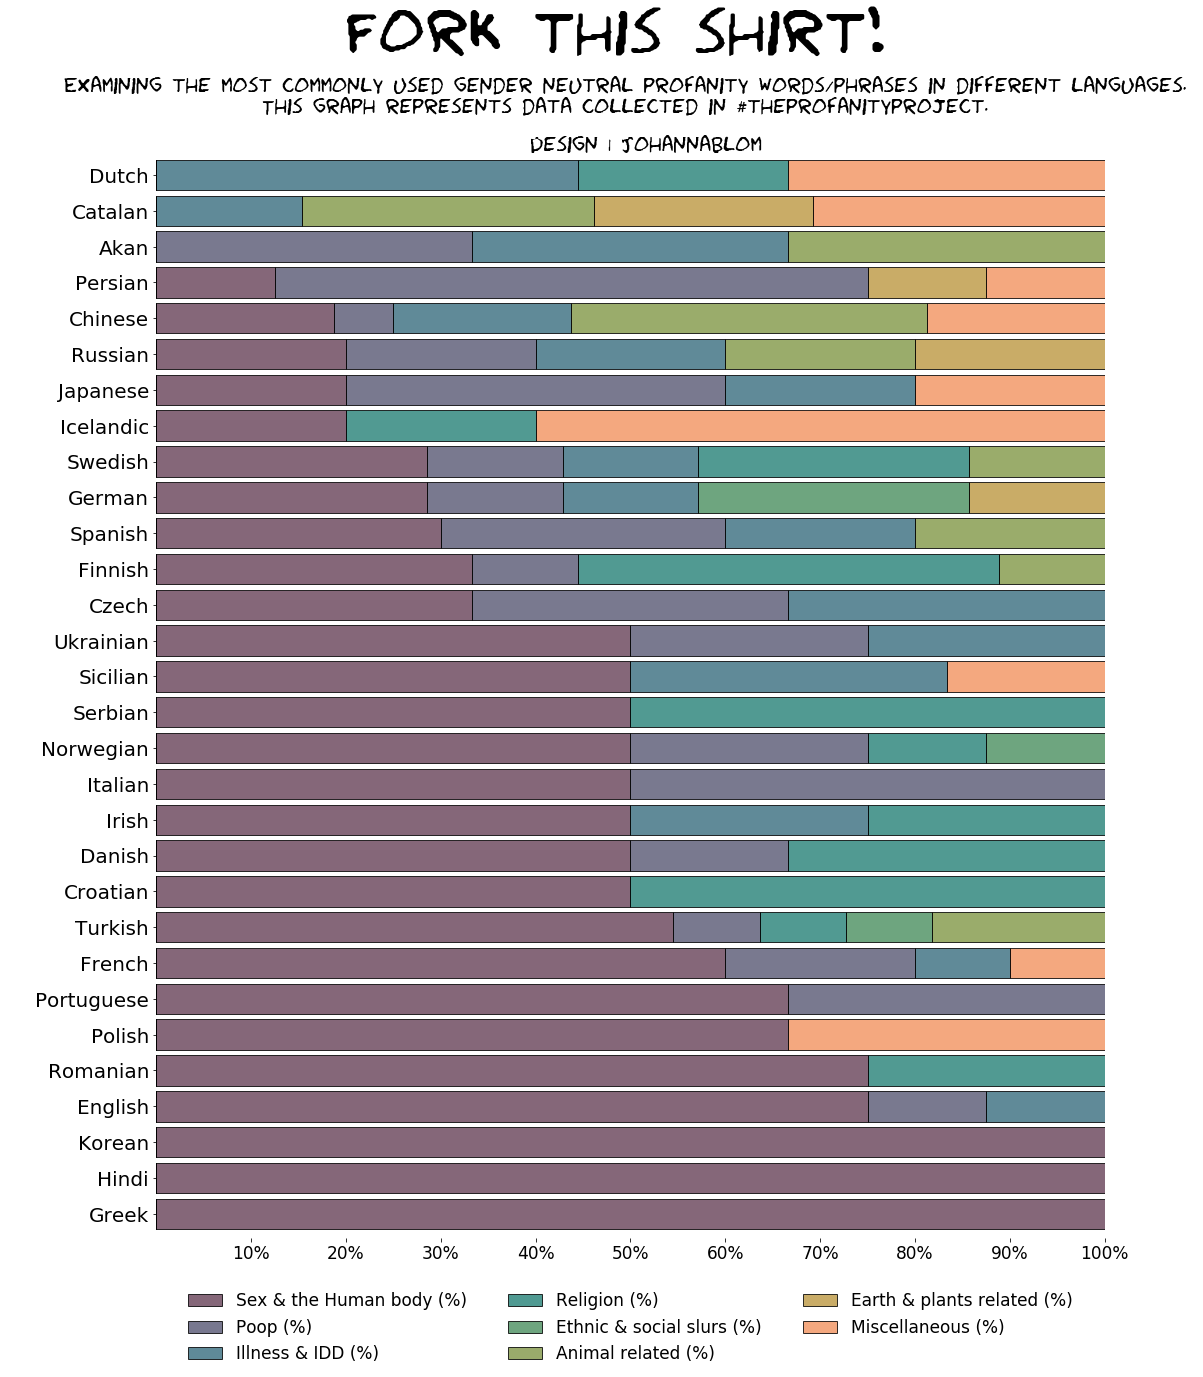

In [10]:
## Deciding a specific font
csfont = {'fontname':'Humor Sans'} 

## Deciding specific colors
colors = ["#674158", "#575773","#386D7F", "#258177", "#4A8F5F","#819746", "#BC9841", "#F2935F"]

## The graph 
fig, ax = plt.subplots()
stacked_gn = gnraw1_ordered.plot.barh(figsize=(17, 20), zorder=10, width=0.85, 
                                   stacked = True, alpha = 0.8, edgecolor='black', ax = ax, color = colors)

stacked_gn.legend(bbox_to_anchor=(0., 1.05, 1., -1.07), loc='upper center', fontsize = 17,
           ncol=3, mode="expand", borderaxespad=1.5, frameon = False)


stacked_gn.set_xlim([0,1])                         
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1],
          ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])

    
#Makin things pretty
plt.suptitle("Fork this shirt!", fontsize = 65, y = .98, **csfont)
stacked_gn.set_title("Examining the most commonly used gender neutral profanity words/phrases in different languages. \n This graph represents data collected in #theprofanityproject.  \n \n   Design | JohannaBlom\n" , fontsize = 21, y = .98, **csfont)
stacked_gn.set_ylabel(" ", fontsize = 25, )
stacked_gn.set_xlabel(" ", fontsize = 12)
stacked_gn.tick_params(axis='y', colors='black', labelsize=20)
stacked_gn.tick_params(axis='x', colors='black', labelsize=17)

## Making things more pretty removing spines
stacked_gn.spines['top'].set_visible(False)
stacked_gn.spines['bottom'].set_visible(False)
stacked_gn.spines['left'].set_visible(False)
stacked_gn.spines['right'].set_visible(False)

## SAVE GRAPH
plt.savefig(r'pp_gender_neutral.png', dpi=75)